## Hyperparameter Optimization For Xgboost using RandomizedSearchCV

In [18]:
import pandas as pd

In [19]:
## Read the Dataset

df=pd.read_csv('D:\IDP\Citrus_features.csv')

In [20]:
df.head()

,convex_area,area,eccentricity,extent,inertia_tensor-0-0,inertia_tensor-0-1,inertia_tensor-1-0,inertia_tensor-1-1,major_axis_length,minor_axis_length,...,bbox-2,bbox-3,perimeter_area_ratio,real_images,mean_intensity_new,std_intensity_new,25th Percentile,75th Percentile,iqr,label
0,50670,25224,0.897906,0.291944,3487.739452,3060.420763,3060.420763,6858.740483,372.389134,163.920749,...,360,240,0.114932,[[0.44105098 0.44832863 0.45338902 ... 0.45358...,0.410772,0.092774,0.351826,0.482767,0.130942,Melanose
1,12,11,0.965078,0.785714,3.355372,0.057851,0.057851,0.231405,7.328239,1.919725,...,2,203,1.056484,[[0.42587765 0.42195608 0.42925647 0.42925647 ...,0.430138,0.003562,0.429256,0.432001,0.002744,Melanose
2,122,82,0.972748,0.433862,48.518888,5.054581,5.054581,3.195271,28.021632,6.497280,...,7,266,0.667847,[[0.41405961 0.38296196 0.35745255 0.32996314 ...,0.440171,0.035004,0.423071,0.464268,0.041196,Melanose
3,137,101,0.965433,0.577143,42.417802,-1.071268,-1.071268,2.912852,26.060493,6.792729,...,7,418,0.536764,[[0.44139529 0.44139529 0.43469098 0.43076941 ...,0.427137,0.043577,0.396725,0.453290,0.056565,Melanose
4,4595,3214,0.886202,0.517136,186.554334,-110.577201,-110.577201,750.898946,111.124569,51.483810,...,113,453,0.196736,[[0.42765843 0.42176471 0.41981529 ... 0.41892...,0.443635,0.115014,0.391364,0.480459,0.089096,Melanose


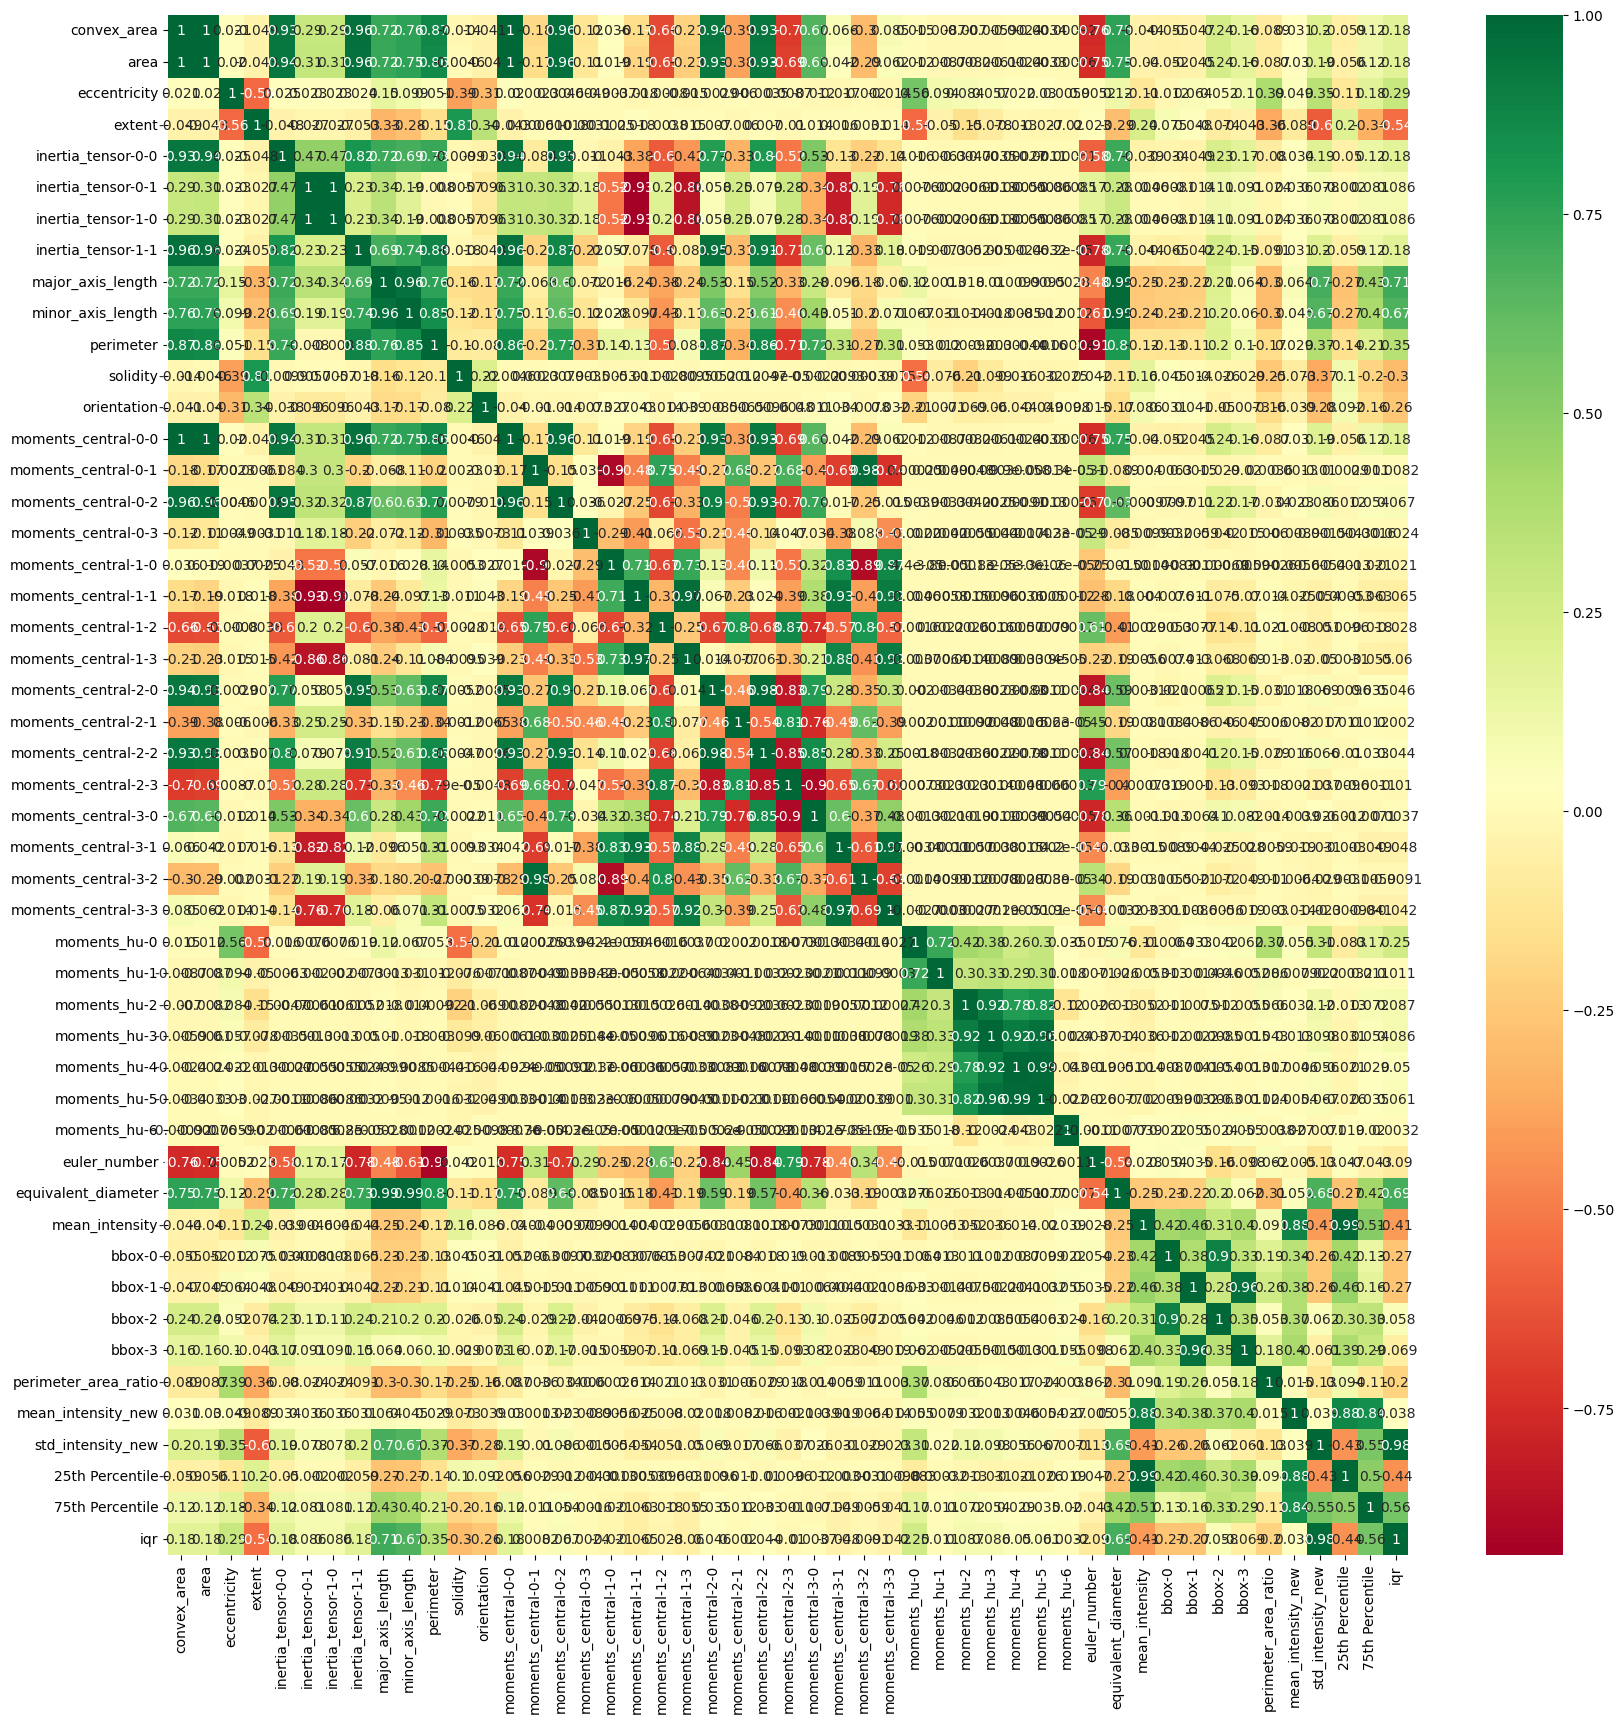

In [21]:
## Correlation
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [22]:
X = df.iloc[:, :-1]
y = df.iloc[:,-1:]

In [28]:
geography=pd.get_dummies(X['Geography'],drop_first=True)

In [29]:
geography.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [30]:
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [31]:
gender.head()

,Male
0,0
1,0
2,0
3,0
4,0


In [32]:
## Drop Categorical Features
X=X.drop(['Geography','Gender'],axis=1)

In [33]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [34]:
X=pd.concat([X,geography,gender],axis=1)

In [35]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [23]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

In [24]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV 

In [1]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from xgboost import XGBClassifier


In [2]:

def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [3]:
classifier=xgboost.XGBClassifier()

NameError: name 'xgboost' is not defined

In [26]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

NameError: name 'classifier' is not defined

ERROR: Exception:
Traceback (most recent call last):
  File "c:\Users\gnana\AppData\Local\Programs\Python\Python37\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "c:\Users\gnana\AppData\Local\Programs\Python\Python37\lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
  File "c:\Users\gnana\AppData\Local\Programs\Python\Python37\lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
  File "c:\Users\gnana\AppData\Local\Programs\Python\Python37\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 98, in read
    data: bytes = self.__fp.read(amt)
  File "c:\Users\gnana\AppData\Local\Programs\Python\Python37\lib\http\client.py", line 457, in read
    n = self.readinto(b)
  File "c:\Users\gnana\AppData\Local\Programs\Python\Python37\lib\http\client.py", line 501, in re

  Using cached xgboost-1.6.2-py3-none-win_amd64.whl.metadata (1.8 kB)
   --------------------                     64.8/125.4 MB 45.6 kB/s eta 0:22:10


In [41]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:    5.3s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    5.7s finished



 Time taken: 0 hours 0 minutes and 6.18 seconds.


In [43]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [54]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0.4, learning_rate=0.1,
       max_delta_step=0, max_depth=6, min_child_weight=7, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [44]:
random_search.best_params_

{'min_child_weight': 7,
 'max_depth': 6,
 'learning_rate': 0.1,
 'gamma': 0.4,
 'colsample_bytree': 0.5}

In [56]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0.4, learning_rate=0.1,
       max_delta_step=0, max_depth=6, min_child_weight=7, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [57]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X,Y,cv=10)

In [58]:
score

array([0.87012987, 0.86613387, 0.87012987, 0.867     , 0.862     ,
       0.852     , 0.864     , 0.87887888, 0.85885886, 0.85785786])

In [59]:
score.mean()

0.8646989201989201